<a href="https://colab.research.google.com/github/Zhongqi2/trajectory_optimization_lib/blob/main/data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Workshop

**Date:** October 3, 2025  
**Organization:** DSC

This notebook accompanies the Data Visualization workshop presentation. It provides hands-on examples and exercises to reinforce the concepts covered in the slides.

## Setup and Installation

First, let's make sure we have all the necessary libraries installed. Run the following cell to install any missing packages:

In [1]:
# Uncomment and run if you need to install any packages
!pip install matplotlib seaborn plotly pandas numpy scikit-learn

In [2]:
# Import the libraries we'll be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('colorblind')

# For displaying plots inline in the notebook
%matplotlib inline

# Check versions
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Plotly version: {plotly.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Plotly version: 5.24.1
Pandas version: 2.2.2
NumPy version: 2.0.2


## 1. Data Preparation

Let's load some datasets that we'll use throughout this workshop:

In [3]:
# Load built-in datasets from seaborn
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')
planets = sns.load_dataset('planets')
titanic = sns.load_dataset('titanic')

# Display the first few rows of each dataset
print("Tips dataset:")
display(tips.head())

print("\nFlights dataset:")
display(flights.head())

print("\nIris dataset:")
display(iris.head())

print("\nPlanets dataset:")
display(planets.head())

print("\nTitanic dataset:")
display(titanic.head())

Tips dataset:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



Flights dataset:


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121



Iris dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Planets dataset:


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009



Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's also create some synthetic data for specific examples:

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a time series dataset
dates = pd.date_range('2023-01-01', periods=365, freq='D')
time_series_data = pd.DataFrame({
    'date': dates,
    'value': np.cumsum(np.random.randn(365)) + 100,  # Random walk starting at 100
    'trend': np.linspace(0, 30, 365),  # Linear trend
    'seasonal': 10 * np.sin(np.linspace(0, 2*np.pi*4, 365))  # Seasonal component
})

# Add the components together
time_series_data['total'] = time_series_data['value'] + time_series_data['trend'] + time_series_data['seasonal']

# Create a dataset for correlation examples
n = 100
x = np.random.randn(n)
correlation_data = pd.DataFrame({
    'x': x,
    'y_strong_pos': x * 3 + np.random.randn(n) * 0.5 + 2,  # Strong positive correlation
    'y_weak_pos': x * 0.5 + np.random.randn(n) * 2,  # Weak positive correlation
    'y_strong_neg': -x * 3 + np.random.randn(n) * 0.5,  # Strong negative correlation
    'y_none': np.random.randn(n) * 3  # No correlation
})

# Create a dataset for categorical examples
categories = ['A', 'B', 'C', 'D', 'E']
categorical_data = pd.DataFrame({
    'category': np.random.choice(categories, size=200),
    'value1': np.random.randn(200) * 10 + 50,
    'value2': np.random.randn(200) * 5 + 25,
    'group': np.random.choice(['Group 1', 'Group 2'], size=200)
})

# Display the first few rows of each synthetic dataset
print("Time series data:")
display(time_series_data.head())

print("\nCorrelation data:")
display(correlation_data.head())

print("\nCategorical data:")
display(categorical_data.head())

Time series data:


,date,value,trend,seasonal,total
0,2023-01-01,100.496714,0.000000,0.000000,100.496714
1,2023-01-02,100.358450,0.082418,0.689911,101.130779
2,2023-01-03,101.006138,0.164835,1.376535,102.547509
3,2023-01-04,102.529168,0.247253,2.056599,104.833020
4,2023-01-05,102.295015,0.329670,2.726862,105.351547



Correlation data:


,x,y_strong_pos,y_weak_pos,y_strong_neg,y_none
0,-0.401220,0.685854,-1.016761,1.256877,-2.109529
1,0.224092,2.979361,-3.964203,-0.799766,-0.104965
2,0.012592,2.416531,-2.009876,0.714219,5.312402
3,0.097676,2.027778,-3.692746,-1.618513,-1.880901
4,-0.773010,-0.606938,-1.089532,2.864783,5.437346



Categorical data:


,category,value1,value2,group
0,A,46.122984,27.755187,Group 2
1,C,74.020263,34.233133,Group 1
2,A,49.773969,26.111414,Group 1
3,B,55.248888,25.802381,Group 1
4,D,67.816251,20.313860,Group 2


## 2. Matplotlib Basics

Matplotlib is the foundation of data visualization in Python. Let's start with some basic examples:

### 2.1 Line Plots

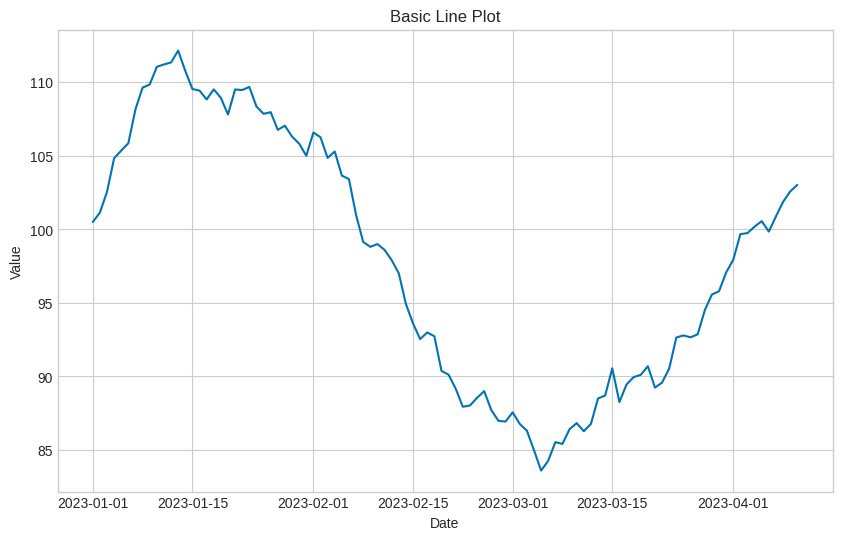

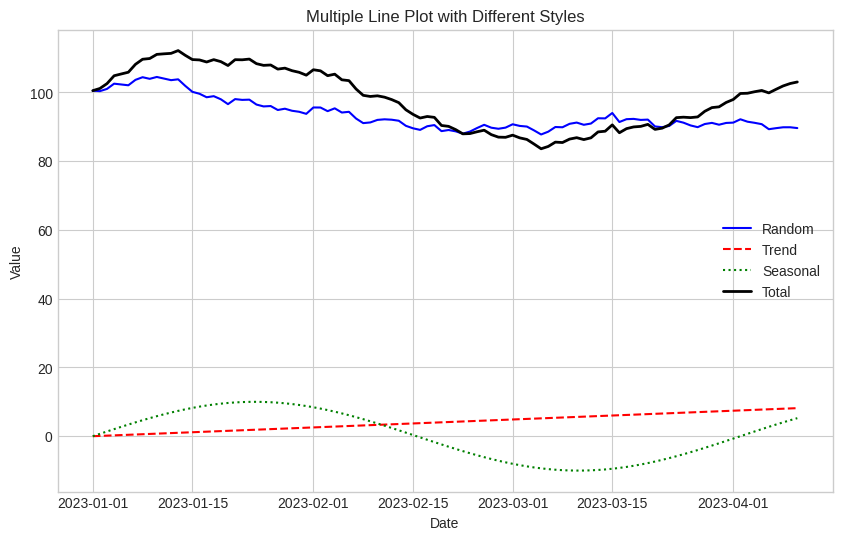

In [6]:
# Basic line plot
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['date'][:100], time_series_data['total'][:100])
plt.title('Basic Line Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Multiple lines with different styles
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['date'][:100], time_series_data['value'][:100], 'b-', label='Random')
plt.plot(time_series_data['date'][:100], time_series_data['trend'][:100], 'r--', label='Trend')
plt.plot(time_series_data['date'][:100], time_series_data['seasonal'][:100], 'g:', label='Seasonal')
plt.plot(time_series_data['date'][:100], time_series_data['total'][:100], 'k-', linewidth=2, label='Total')
plt.title('Multiple Line Plot with Different Styles')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### 2.2 Scatter Plots

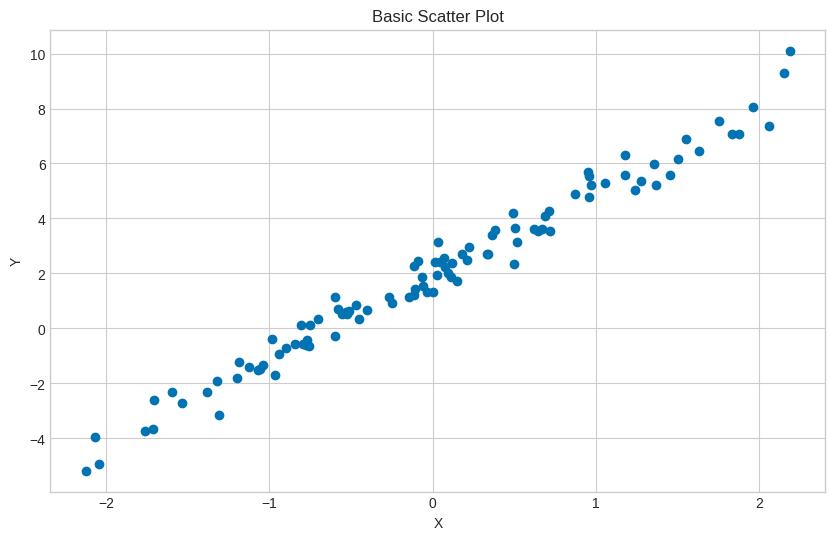

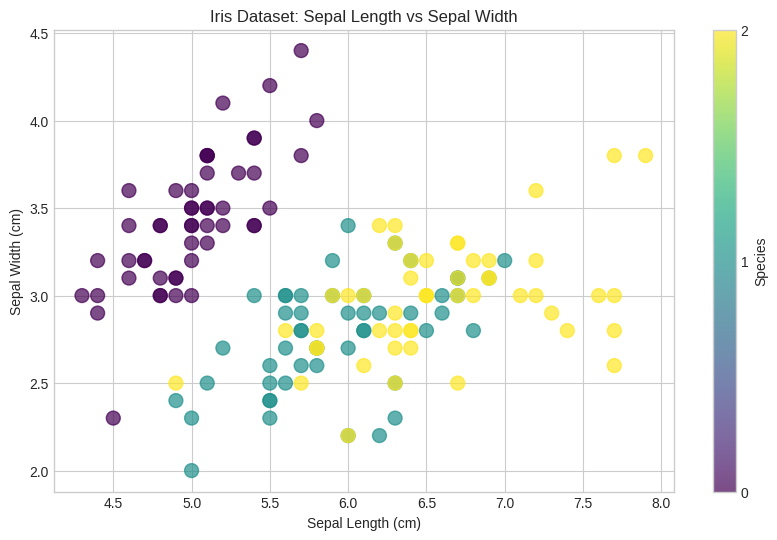

In [7]:
# Basic scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(correlation_data['x'], correlation_data['y_strong_pos'])
plt.title('Basic Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Scatter plot with color mapping
plt.figure(figsize=(10, 6))
plt.scatter(iris['sepal_length'], iris['sepal_width'],
            c=iris['species'].astype('category').cat.codes,
            cmap='viridis',
            s=100,
            alpha=0.7)
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.grid(True)
plt.show()

### 2.3 Bar Charts

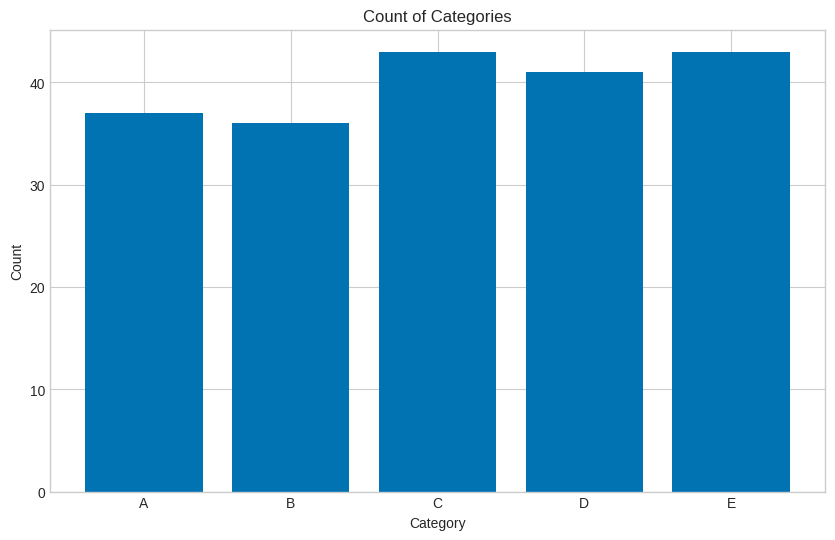

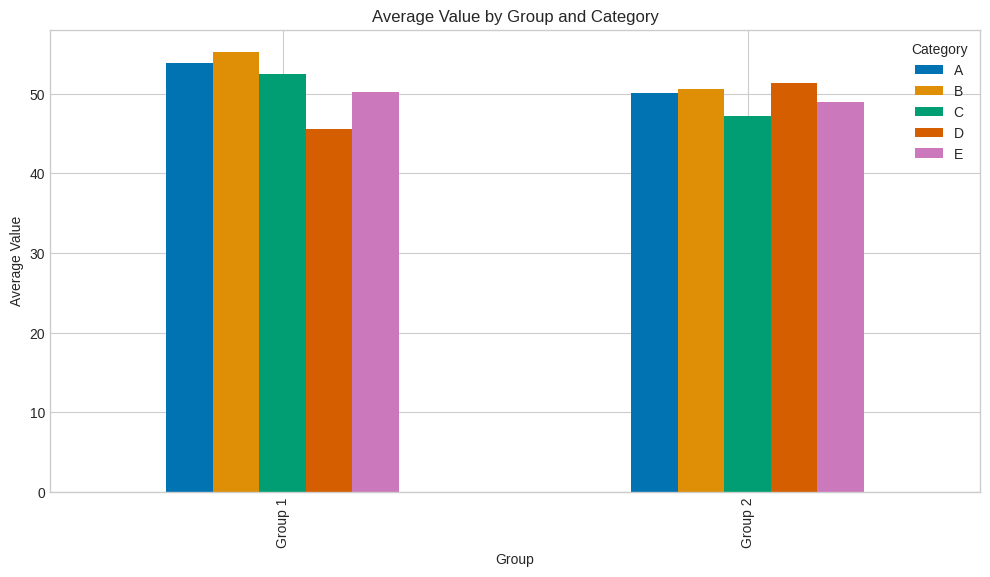

In [8]:
# Basic bar chart
category_counts = categorical_data['category'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

# Grouped bar chart
group_category = categorical_data.groupby(['group', 'category'])['value1'].mean().unstack()
group_category.plot(kind='bar', figsize=(12, 6))
plt.title('Average Value by Group and Category')
plt.xlabel('Group')
plt.ylabel('Average Value')
plt.grid(True, axis='y')
plt.legend(title='Category')
plt.show()

### 2.4 Histograms and Density Plots

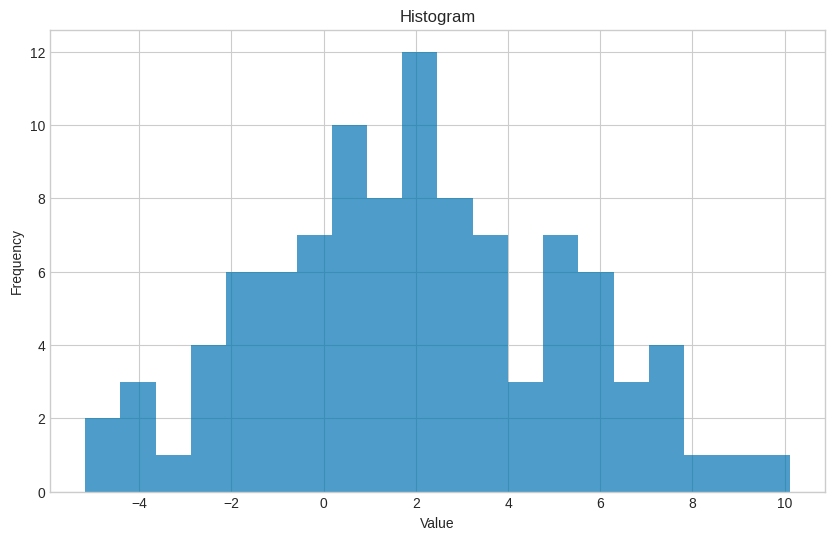

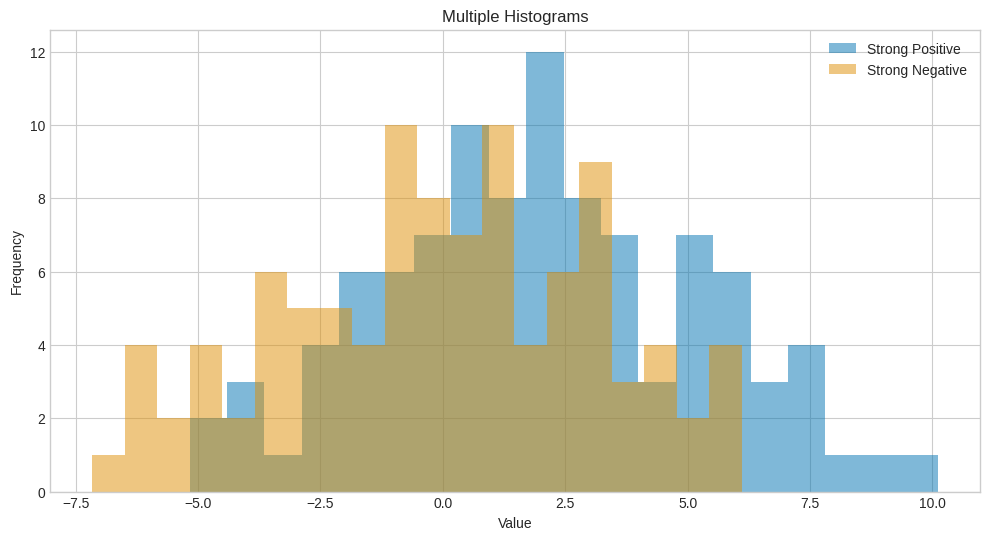

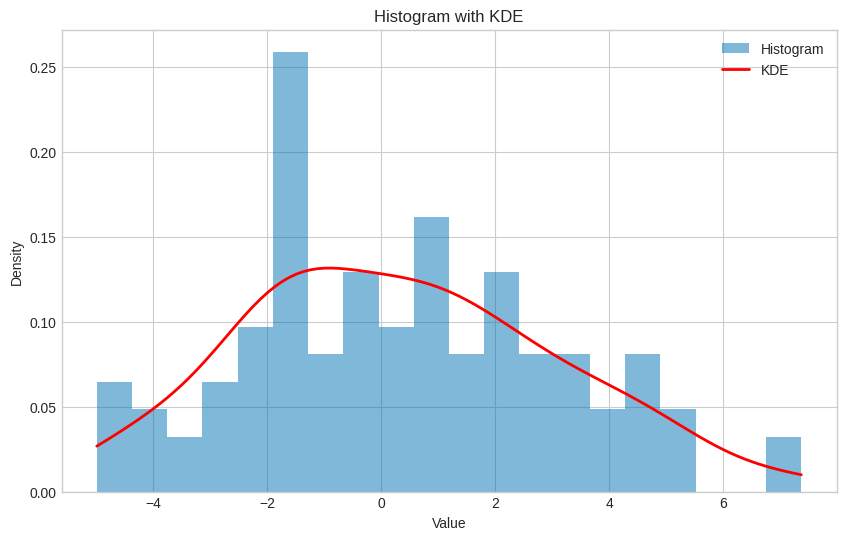

In [9]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(correlation_data['y_strong_pos'], bins=20, alpha=0.7)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Multiple histograms
plt.figure(figsize=(12, 6))
plt.hist(correlation_data['y_strong_pos'], bins=20, alpha=0.5, label='Strong Positive')
plt.hist(correlation_data['y_strong_neg'], bins=20, alpha=0.5, label='Strong Negative')
plt.title('Multiple Histograms')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Histogram with KDE
plt.figure(figsize=(10, 6))
plt.hist(correlation_data['y_none'], bins=20, density=True, alpha=0.5, label='Histogram')

# Add KDE curve
from scipy import stats
kde = stats.gaussian_kde(correlation_data['y_none'])
x_vals = np.linspace(correlation_data['y_none'].min(), correlation_data['y_none'].max(), 100)
plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')

plt.title('Histogram with KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### 2.5 Box Plots and Violin Plots

/tmp/ipython-input-848438635.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([correlation_data['y_strong_pos'],


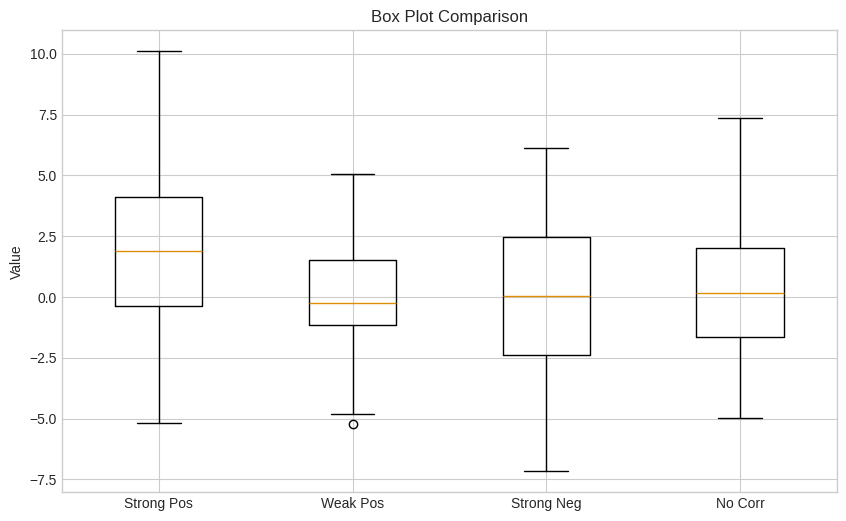

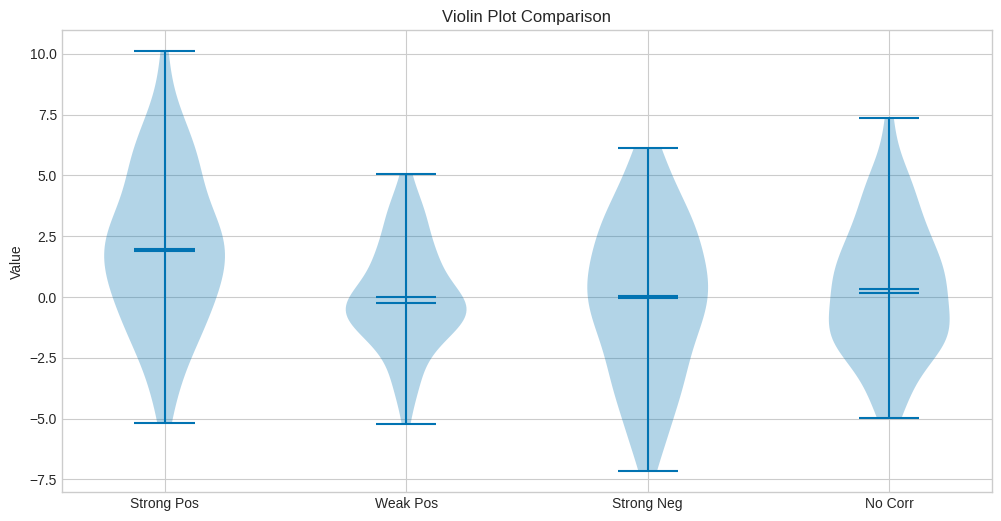

In [10]:
# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot([correlation_data['y_strong_pos'],
             correlation_data['y_weak_pos'],
             correlation_data['y_strong_neg'],
             correlation_data['y_none']],
            labels=['Strong Pos', 'Weak Pos', 'Strong Neg', 'No Corr'])
plt.title('Box Plot Comparison')
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
plt.violinplot([correlation_data['y_strong_pos'],
                correlation_data['y_weak_pos'],
                correlation_data['y_strong_neg'],
                correlation_data['y_none']],
               showmeans=True, showmedians=True)
plt.xticks([1, 2, 3, 4], ['Strong Pos', 'Weak Pos', 'Strong Neg', 'No Corr'])
plt.title('Violin Plot Comparison')
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.show()

### 2.6 Subplots

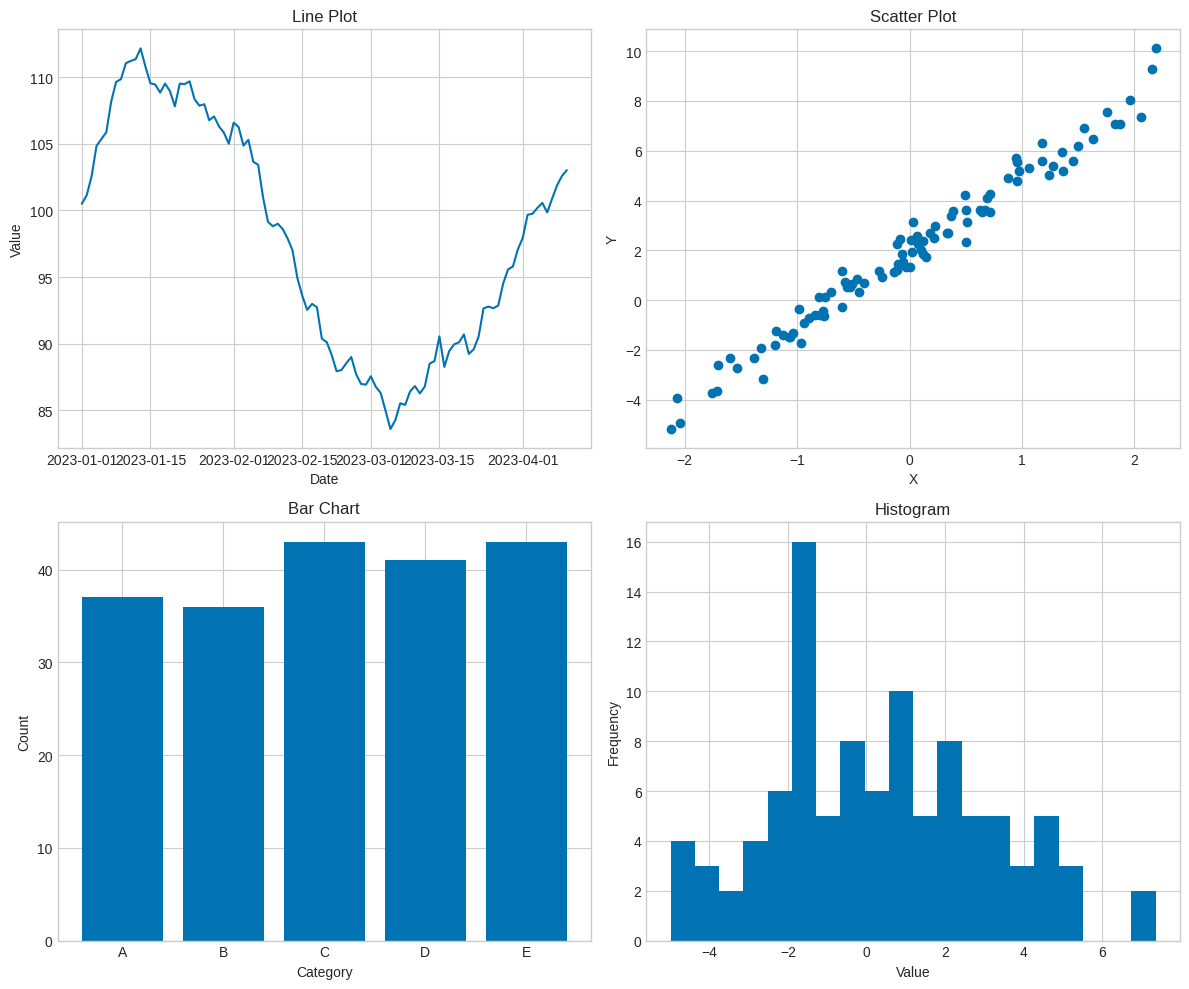

In [11]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Line plot (top-left)
axs[0, 0].plot(time_series_data['date'][:100], time_series_data['total'][:100])
axs[0, 0].set_title('Line Plot')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Value')
axs[0, 0].grid(True)

# Scatter plot (top-right)
axs[0, 1].scatter(correlation_data['x'], correlation_data['y_strong_pos'])
axs[0, 1].set_title('Scatter Plot')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
axs[0, 1].grid(True)

# Bar chart (bottom-left)
axs[1, 0].bar(category_counts.index, category_counts.values)
axs[1, 0].set_title('Bar Chart')
axs[1, 0].set_xlabel('Category')
axs[1, 0].set_ylabel('Count')
axs[1, 0].grid(True, axis='y')

# Histogram (bottom-right)
axs[1, 1].hist(correlation_data['y_none'], bins=20)
axs[1, 1].set_title('Histogram')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### 2.7 Customizing Plots

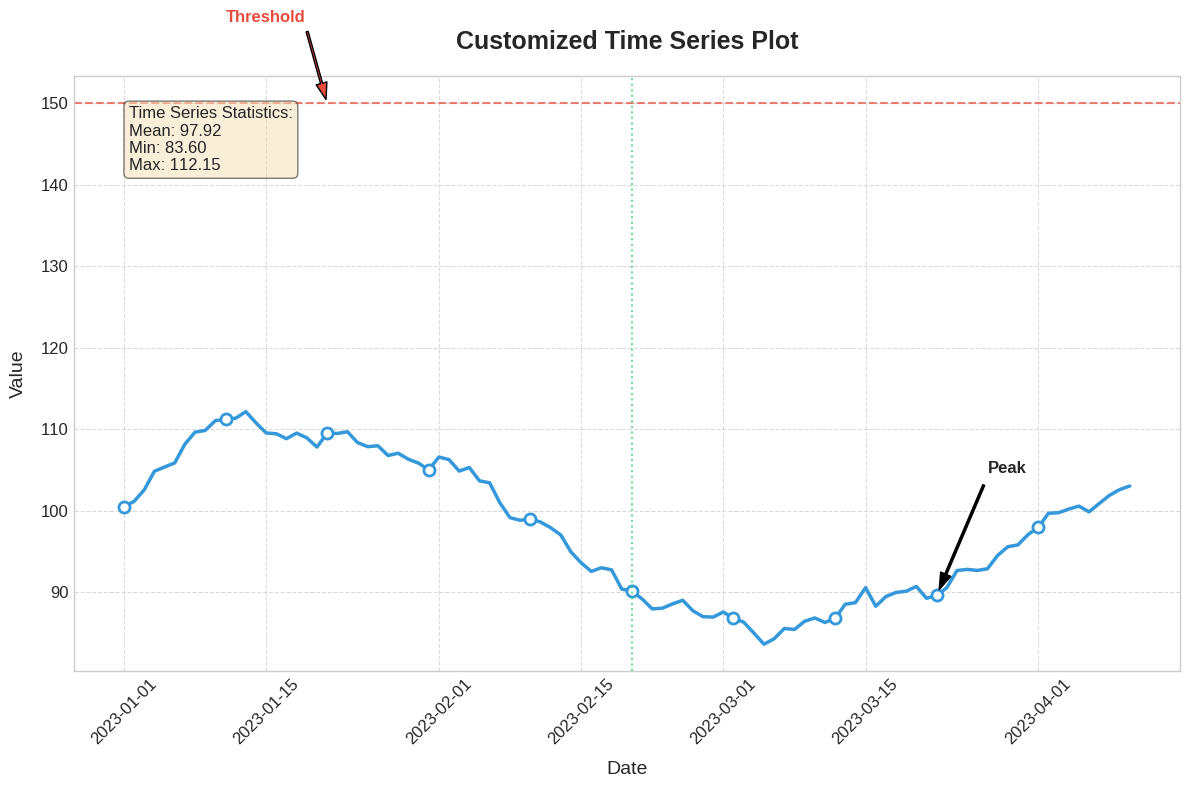

In [12]:
# Create a highly customized plot
plt.figure(figsize=(12, 8))

# Plot data
plt.plot(time_series_data['date'][:100], time_series_data['total'][:100],
         color='#3498db', linewidth=2.5, linestyle='-', marker='o',
         markevery=10, markersize=8, markerfacecolor='white',
         markeredgecolor='#3498db', markeredgewidth=2)

# Add a horizontal line at y=150
plt.axhline(y=150, color='#e74c3c', linestyle='--', alpha=0.7, linewidth=1.5)

# Add a vertical line at a specific date
plt.axvline(x=time_series_data['date'][50], color='#2ecc71', linestyle=':', alpha=0.7, linewidth=1.5)

# Add text annotations
plt.annotate('Peak', xy=(time_series_data['date'][80], time_series_data['total'][80]),
             xytext=(time_series_data['date'][85], time_series_data['total'][80] + 15),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12, fontweight='bold')

plt.annotate('Threshold', xy=(time_series_data['date'][20], 150),
             xytext=(time_series_data['date'][10], 160),
             arrowprops=dict(facecolor='#e74c3c', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12, fontweight='bold', color='#e74c3c')

# Customize title and labels
plt.title('Customized Time Series Plot', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Value', fontsize=14, labelpad=10)

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add grid with custom style
plt.grid(True, linestyle='--', alpha=0.7)

# Add a text box with information
textstr = '\n'.join((
    'Time Series Statistics:',
    f'Mean: {time_series_data["total"][:100].mean():.2f}',
    f'Min: {time_series_data["total"][:100].min():.2f}',
    f'Max: {time_series_data["total"][:100].max():.2f}'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Customize figure
plt.tight_layout()
plt.show()

## 3. Seaborn: Statistical Visualization

Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

### 3.1 Relational Plots

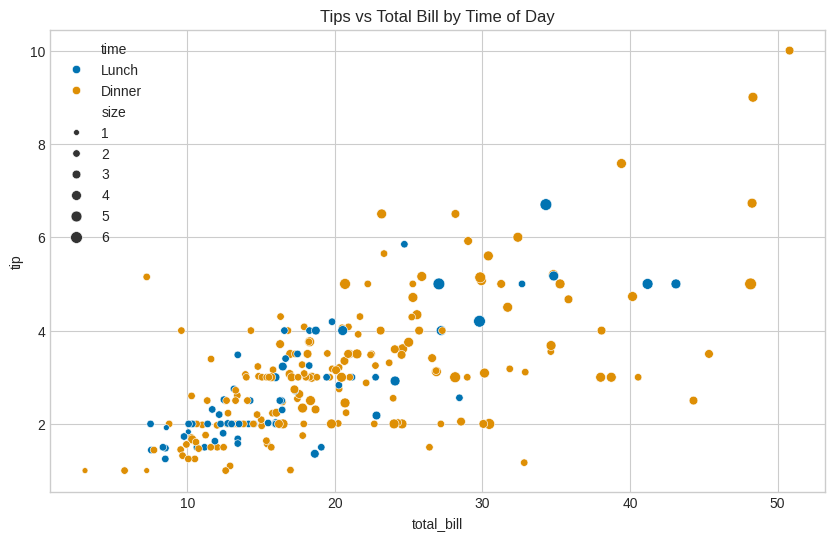

/tmp/ipython-input-3647657002.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.lineplot(x='year', y='passengers', hue='month', data=flights.pivot_table(


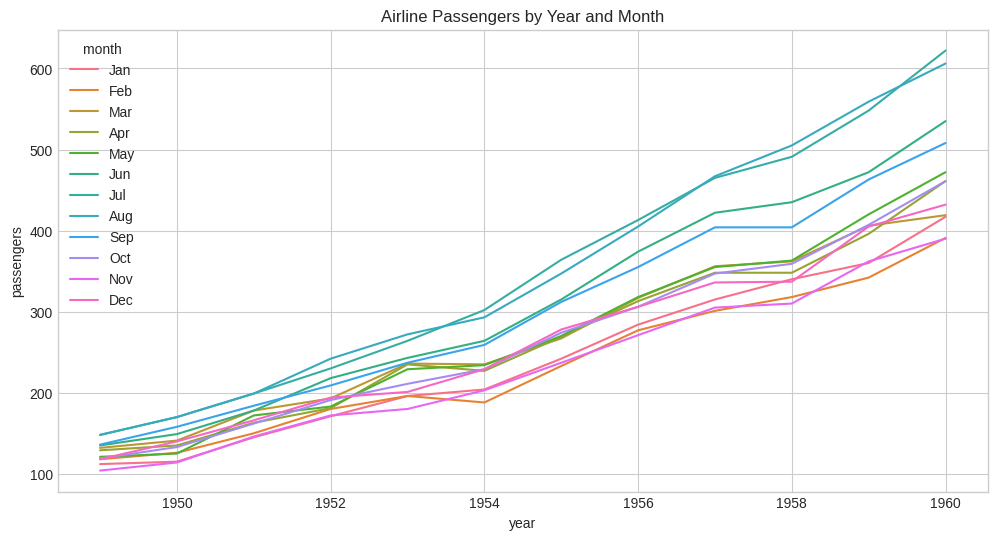

<Figure size 1200x600 with 0 Axes>

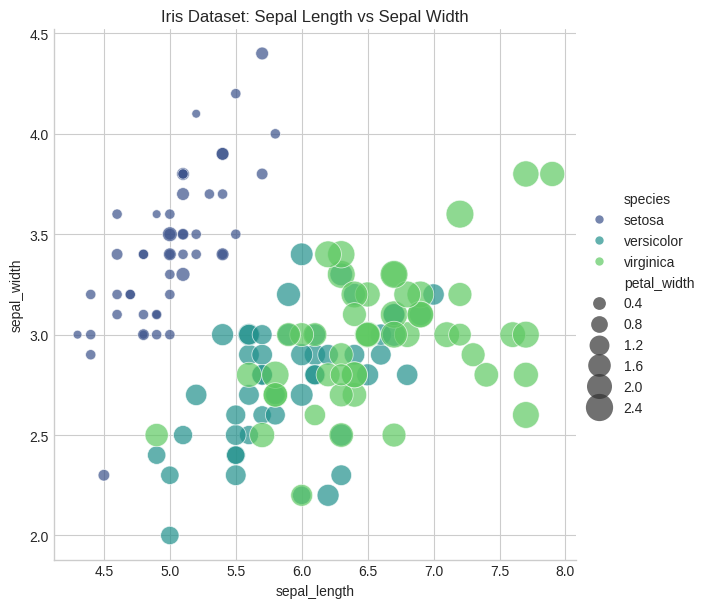

In [13]:
# Scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='time', size='size', data=tips)
plt.title('Tips vs Total Bill by Time of Day')
plt.show()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='passengers', hue='month', data=flights.pivot_table(
    index='year', columns='month', values='passengers').reset_index().melt(
    id_vars='year', var_name='month', value_name='passengers'))
plt.title('Airline Passengers by Year and Month')
plt.show()

# Relational plot with multiple semantic variables
plt.figure(figsize=(12, 6))
sns.relplot(x='sepal_length', y='sepal_width', hue='species', size='petal_width',
            sizes=(40, 400), alpha=0.7, palette='viridis', height=6, data=iris)
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.show()

### 3.2 Categorical Plots

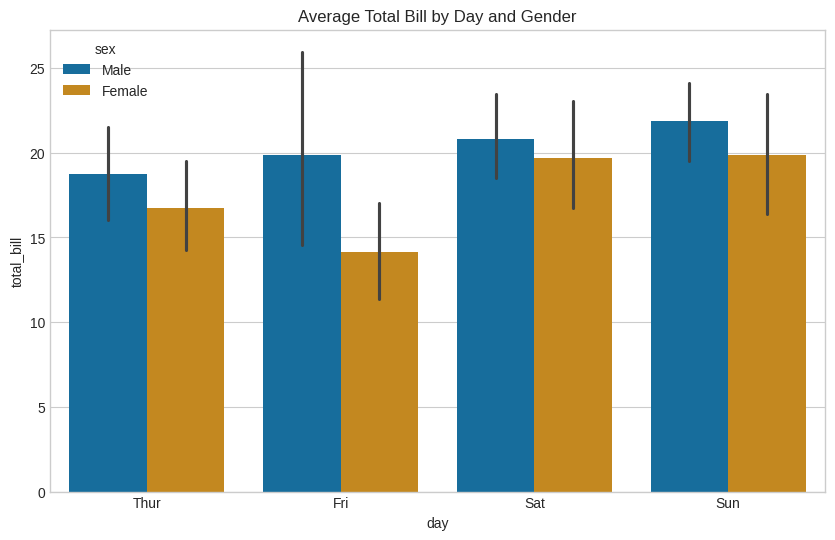

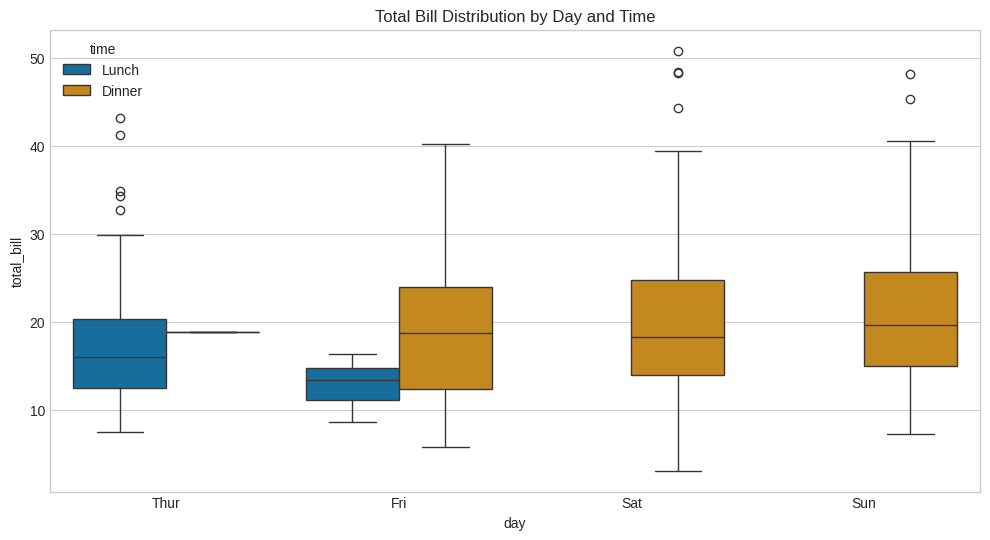

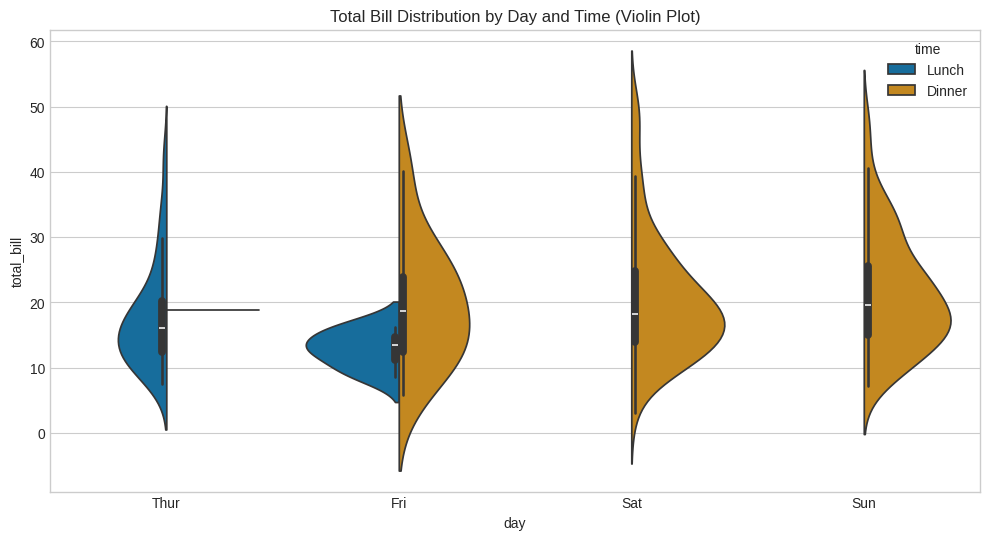

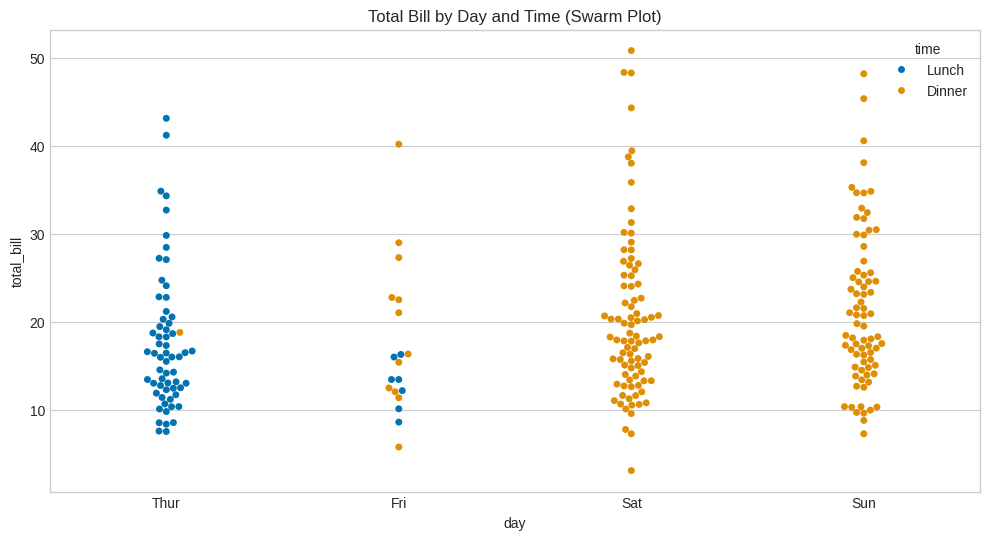

/tmp/ipython-input-200431580.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')


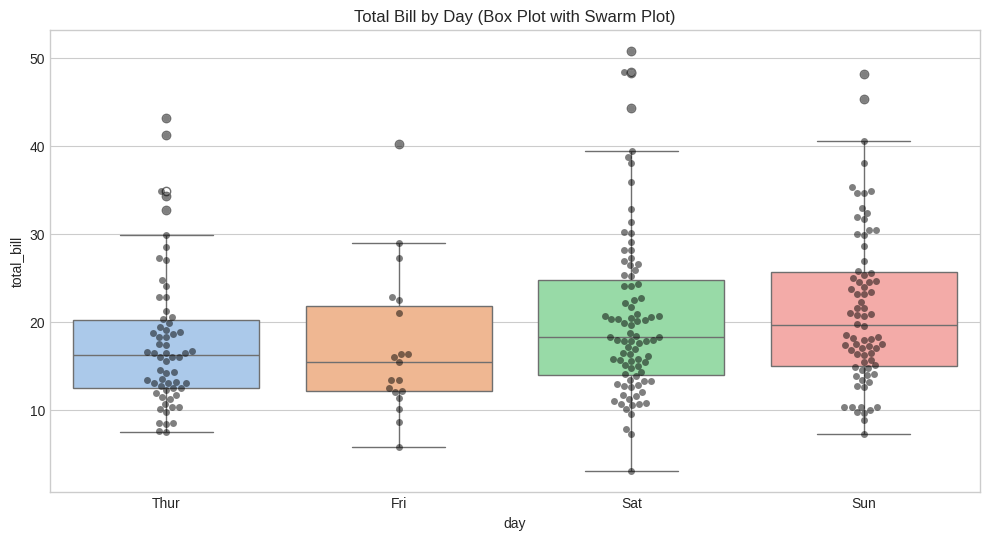

In [14]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('Average Total Bill by Day and Gender')
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)
plt.title('Total Bill Distribution by Day and Time')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='day', y='total_bill', hue='time', split=True, data=tips)
plt.title('Total Bill Distribution by Day and Time (Violin Plot)')
plt.show()

# Swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='day', y='total_bill', hue='time', data=tips)
plt.title('Total Bill by Day and Time (Swarm Plot)')
plt.show()

# Combine box plot and swarm plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')
sns.swarmplot(x='day', y='total_bill', data=tips, color='black', alpha=0.5)
plt.title('Total Bill by Day (Box Plot with Swarm Plot)')
plt.show()

### 3.3 Distribution Plots

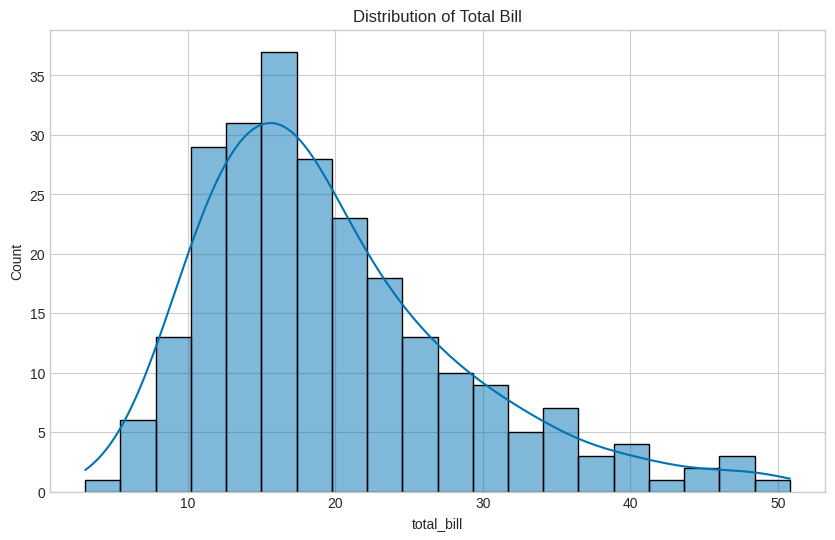

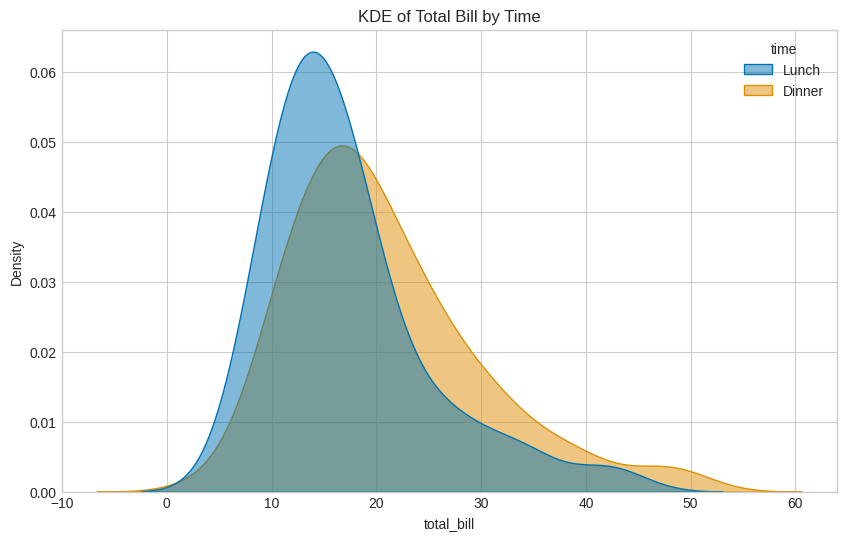

<Figure size 1000x800 with 0 Axes>

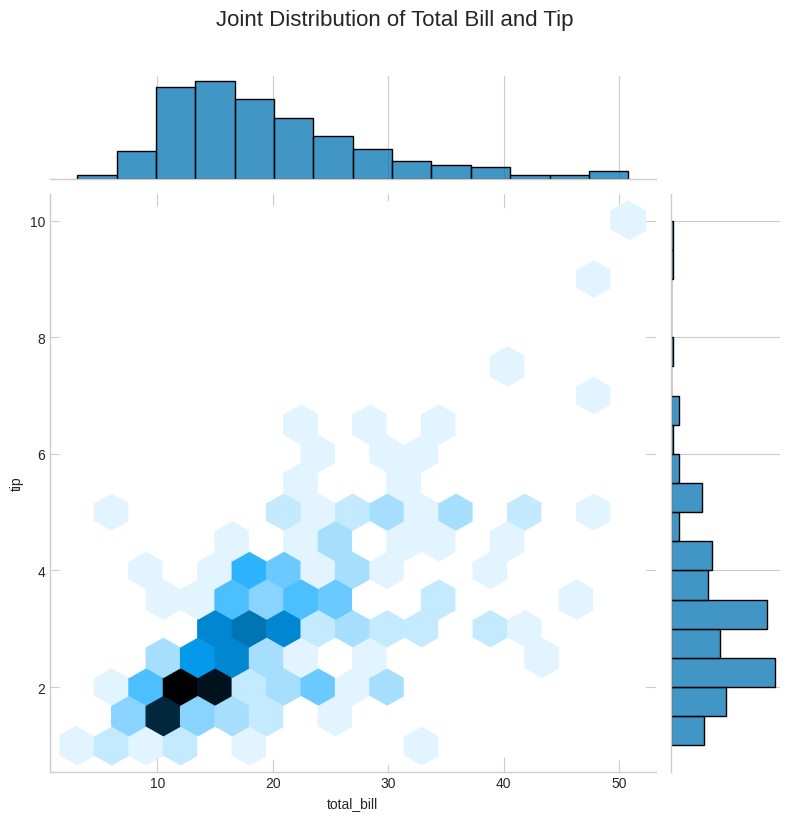

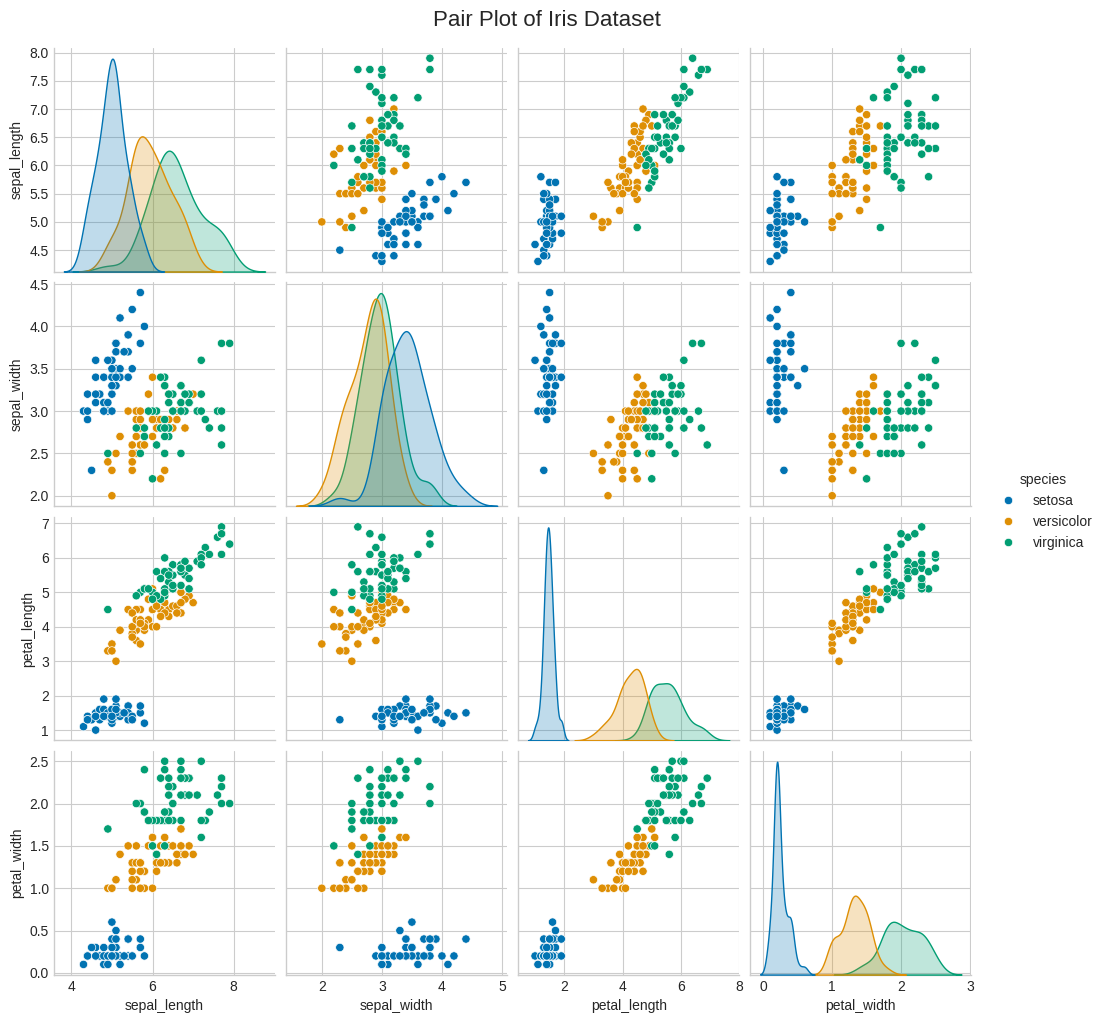

In [15]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.title('Distribution of Total Bill')
plt.show()

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE of Total Bill by Time')
plt.show()

# Bivariate distribution
plt.figure(figsize=(10, 8))
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex', height=8)
plt.suptitle('Joint Distribution of Total Bill and Tip', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle('Pair Plot of Iris Dataset', y=1.02, fontsize=16)
plt.show()

### 3.4 Regression Plots

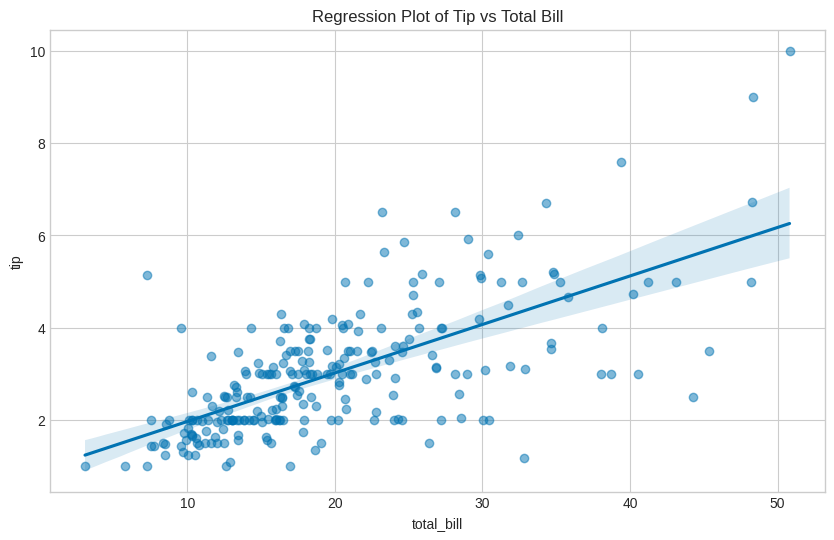

<Figure size 1200x600 with 0 Axes>

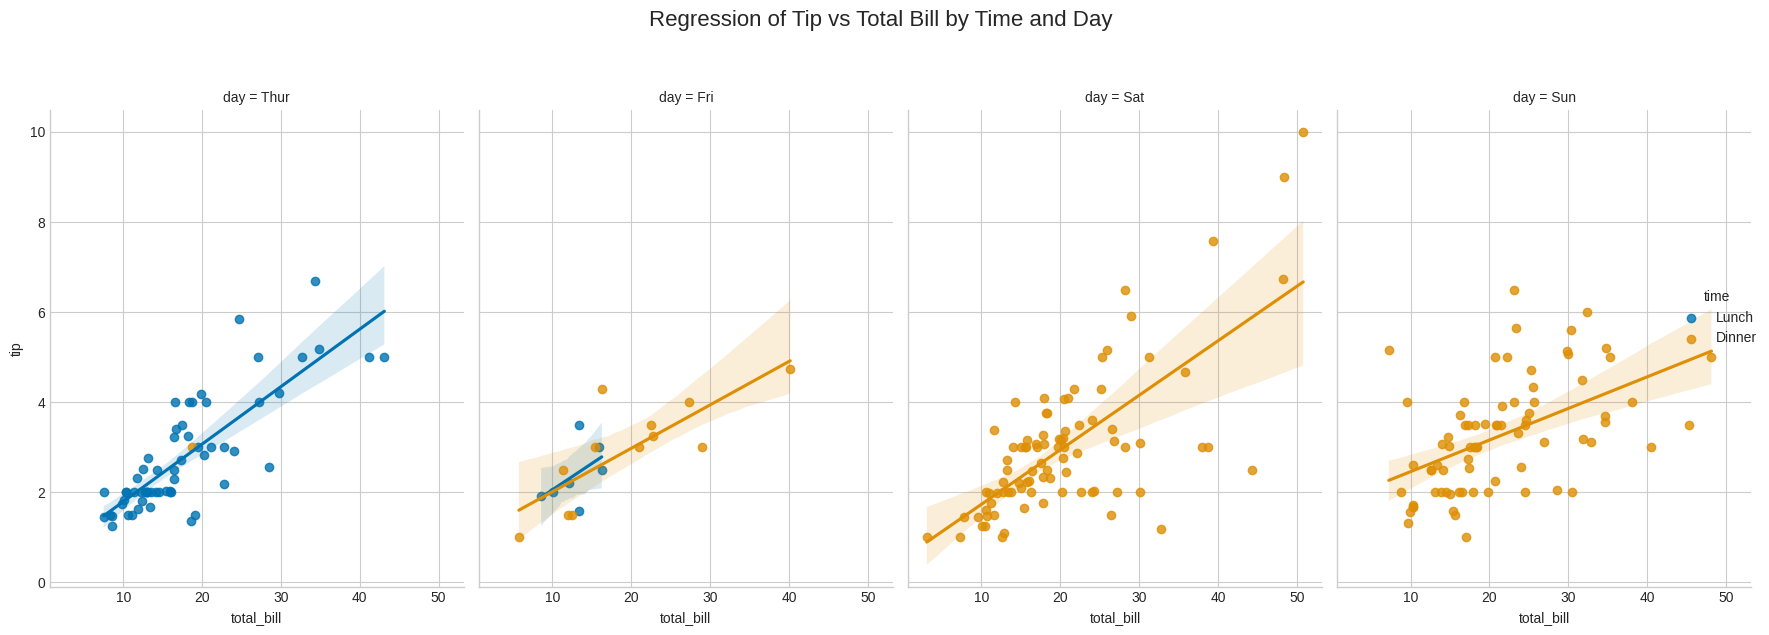

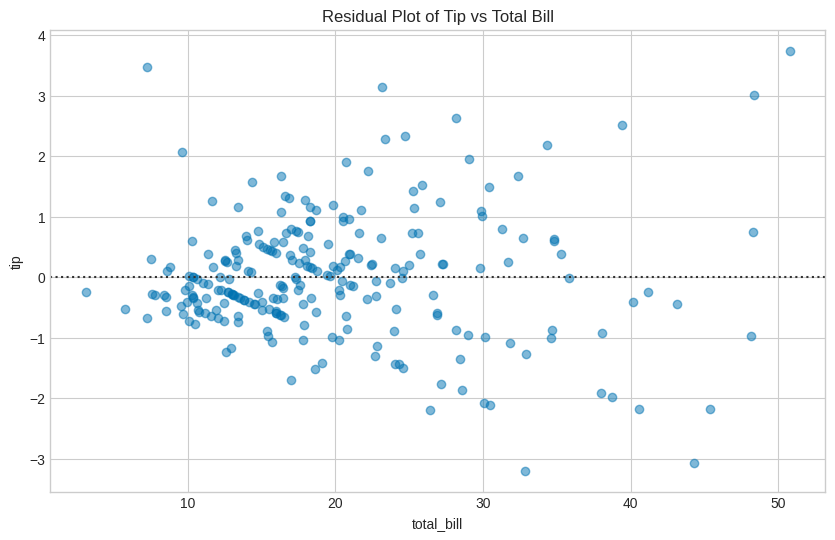

In [16]:
# Simple regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='total_bill', y='tip', data=tips, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Tip vs Total Bill')
plt.show()

# Regression plot with categorical variables
plt.figure(figsize=(12, 6))
sns.lmplot(x='total_bill', y='tip', hue='time', col='day', data=tips, height=6, aspect=0.7)
plt.suptitle('Regression of Tip vs Total Bill by Time and Day', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='total_bill', y='tip', data=tips, scatter_kws={'alpha':0.5})
plt.title('Residual Plot of Tip vs Total Bill')
plt.show()

### 3.5 Matrix Plots

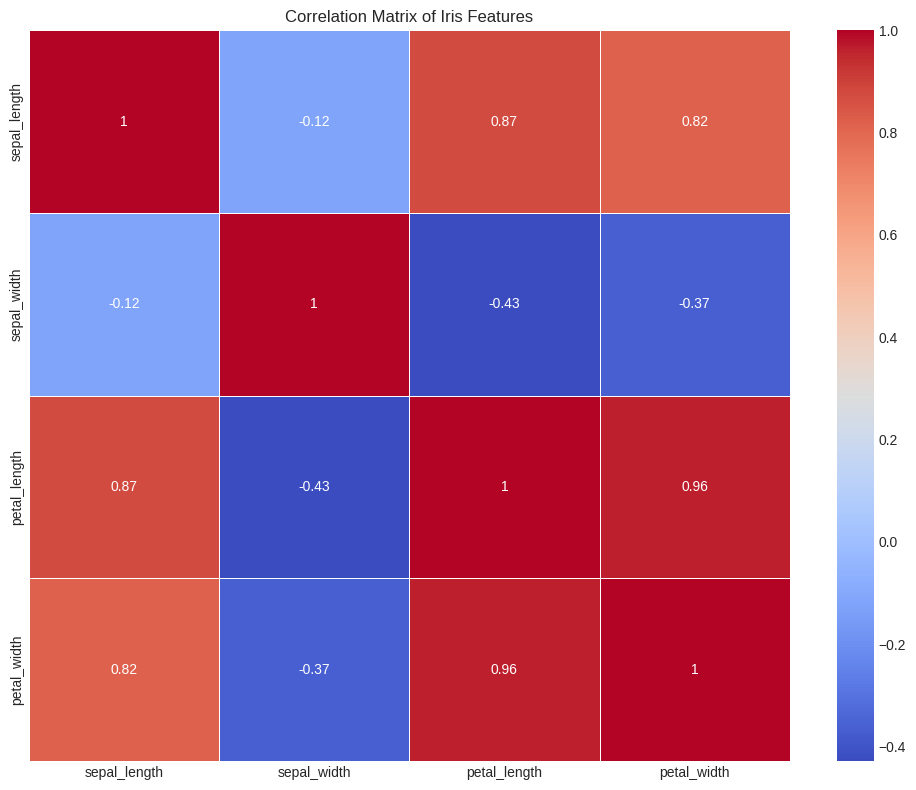

<Figure size 1200x1000 with 0 Axes>

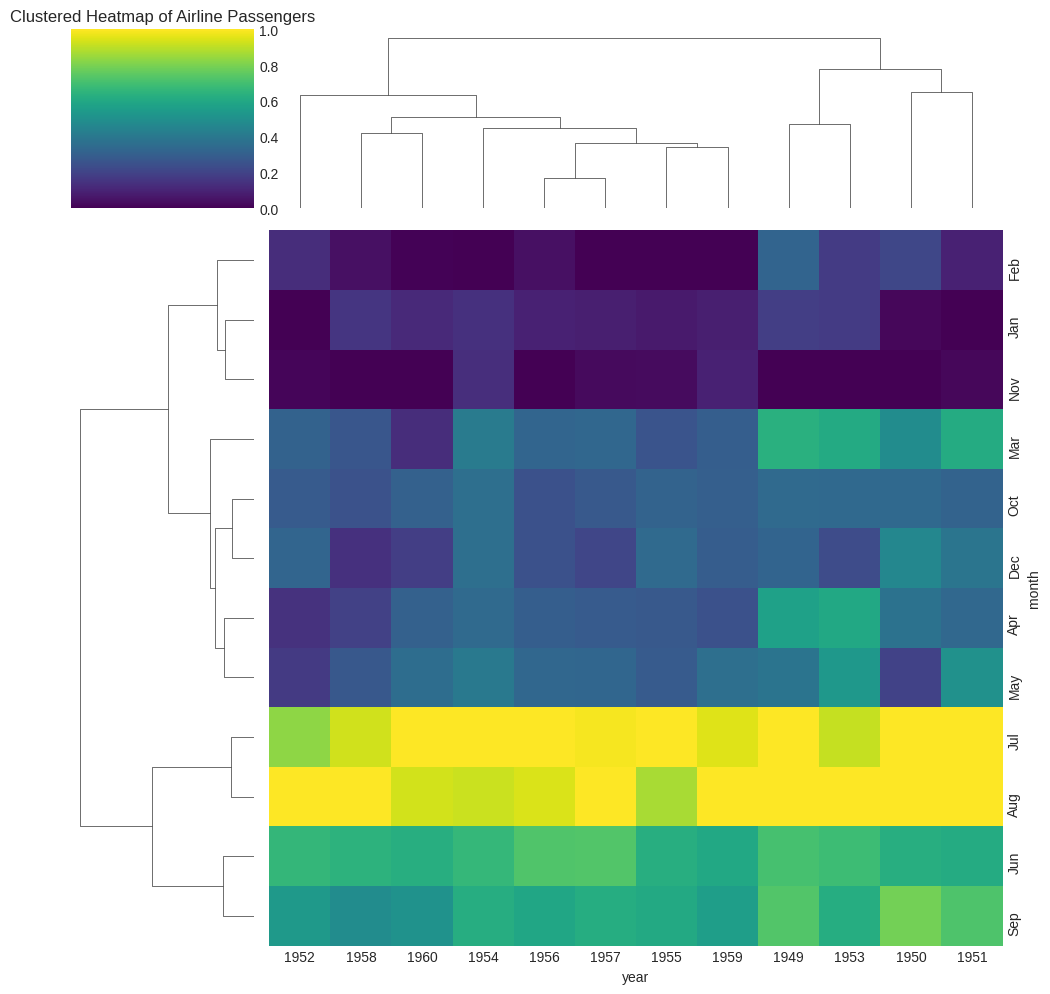

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = iris.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()

# Clustered heatmap
plt.figure(figsize=(12, 10))
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
sns.clustermap(flights_pivot, cmap='viridis', standard_scale=1)
plt.title('Clustered Heatmap of Airline Passengers')
plt.tight_layout()
plt.show()

### 3.6 Customizing Seaborn Plots

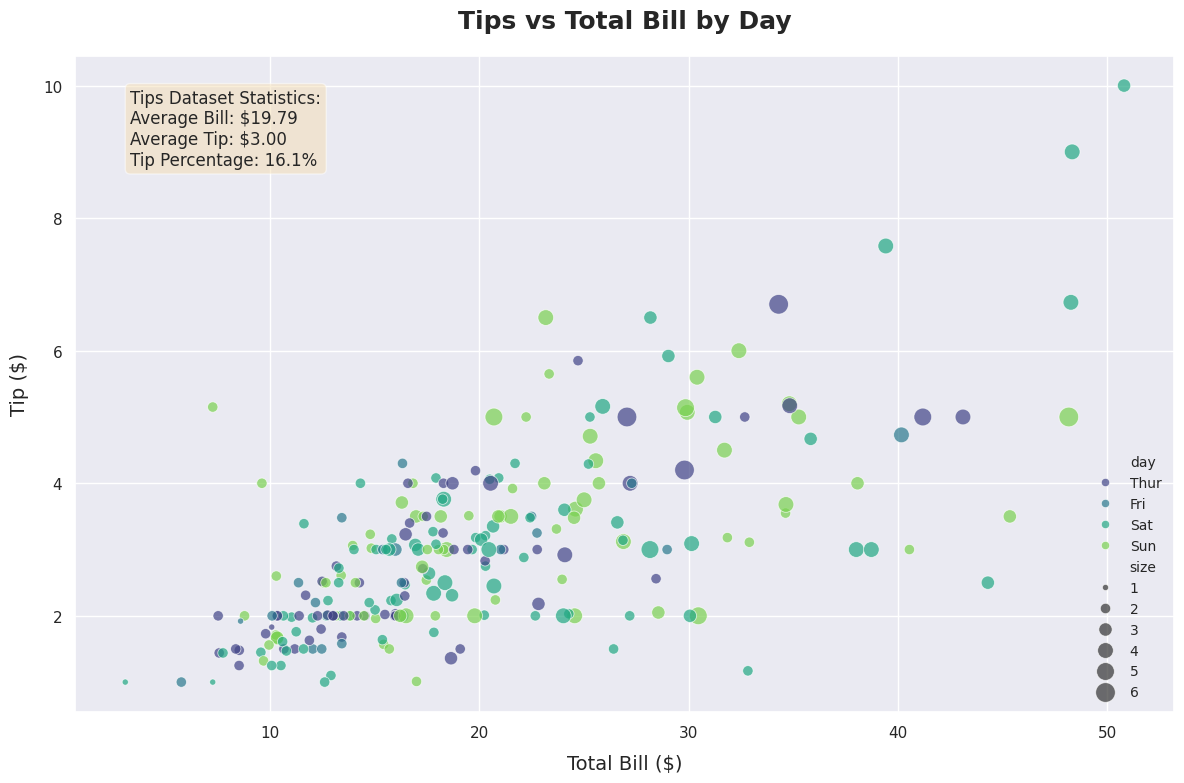

In [18]:
# Set a different theme
sns.set_theme(style="darkgrid", palette="Set2")

# Create a custom plot
plt.figure(figsize=(12, 8))
g = sns.scatterplot(x='total_bill', y='tip', hue='day', size='size',
                    sizes=(20, 200), alpha=0.7, palette='viridis', data=tips)

# Customize the plot
plt.title('Tips vs Total Bill by Day', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Bill ($)', fontsize=14, labelpad=10)
plt.ylabel('Tip ($)', fontsize=14, labelpad=10)
g.legend(title_fontsize=12, fontsize=10)

# Add a text box with information
textstr = '\n'.join((
    'Tips Dataset Statistics:',
    f'Average Bill: ${tips["total_bill"].mean():.2f}',
    f'Average Tip: ${tips["tip"].mean():.2f}',
    f'Tip Percentage: {(tips["tip"] / tips["total_bill"]).mean() * 100:.1f}%'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Reset to default theme
sns.set_theme(style="whitegrid", palette="colorblind")

## 4. Plotly: Interactive Visualizations

Plotly creates interactive visualizations that can be used in web applications and dashboards.

### 4.1 Basic Plotly Express Plots

In [19]:
# Scatter plot
fig = px.scatter(tips, x='total_bill', y='tip', color='day', size='size',
                 hover_name='time', title='Tips vs Total Bill by Day')
fig.show()

# Line plot
fig = px.line(time_series_data[:100], x='date', y=['value', 'trend', 'seasonal', 'total'],
              title='Time Series Components')
fig.show()

# Bar chart
fig = px.bar(tips, x='day', y='total_bill', color='sex', barmode='group',
             title='Total Bill by Day and Gender')
fig.show()

# Histogram
fig = px.histogram(tips, x='total_bill', color='time', marginal='box',
                   title='Distribution of Total Bill by Time')
fig.show()

# Box plot
fig = px.box(tips, x='day', y='total_bill', color='time',
             title='Total Bill Distribution by Day and Time')
fig.show()

### 4.2 Advanced Plotly Express Plots

In [20]:
# Scatter matrix
fig = px.scatter_matrix(iris, dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                        color='species', title='Scatter Matrix of Iris Dataset')
fig.show()

# Parallel coordinates
# Map 'species' to numerical values for the 'color' argument
iris['species_code'] = iris['species'].astype('category').cat.codes
fig = px.parallel_coordinates(iris, color='species_code',
                              dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                              title='Parallel Coordinates of Iris Dataset',
                              color_continuous_scale=px.colors.sequential.Viridis) # Add a colorscale
fig.show()

# Sunburst chart
fig = px.sunburst(titanic, path=['sex', 'class', 'survived'], values='fare',
                  title='Titanic Passengers by Sex, Class, and Survival')
fig.show()

# Treemap
fig = px.treemap(titanic, path=['class', 'sex', 'survived'], values='fare',
                 title='Titanic Passengers by Class, Sex, and Survival')
fig.show()

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### 4.3 Plotly Graph Objects (Low-level API)

In [21]:
# Create a figure with subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Scatter Plot', 'Line Plot', 'Bar Chart', 'Pie Chart'),
                    specs=[[{'type': 'xy'}, {'type': 'xy'}],
                           [{'type': 'xy'}, {'type': 'domain'}]]) # Specify 'domain' type for the pie chart subplot

# Add a scatter plot to the first subplot
fig.add_trace(
    go.Scatter(x=tips['total_bill'], y=tips['tip'], mode='markers',
               marker=dict(size=8, color=tips['size'], colorscale='Viridis', showscale=True)),
    row=1, col=1
)

# Add a line plot to the second subplot
fig.add_trace(
    go.Scatter(x=time_series_data['date'][:50], y=time_series_data['total'][:50], mode='lines+markers'),
    row=1, col=2
)

# Add a bar chart to the third subplot
day_counts = tips['day'].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=day_counts.index, y=day_counts.values, marker_color='indianred'),
    row=2, col=1
)

# Add a pie chart to the fourth subplot
sex_counts = tips['sex'].value_counts()
fig.add_trace(
    go.Pie(labels=sex_counts.index, values=sex_counts.values, hole=0.3),
    row=2, col=2
)

# Update layout
fig.update_layout(height=800, width=1000, title_text='Multiple Plot Types with Plotly Graph Objects',
                  showlegend=False)
fig.show()

### 4.4 3D Plots

In [22]:
# 3D Scatter plot
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_length',
                    color='species', size='petal_width', opacity=0.7,
                    title='3D Scatter Plot of Iris Dataset')
fig.show()

# 3D Surface plot
# Create some sample 3D data
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x_grid, y_grid = np.meshgrid(x, y)
z_grid = np.sin(np.sqrt(x_grid**2 + y_grid**2))

fig = go.Figure(data=[go.Surface(z=z_grid, x=x_grid, y=y_grid)])
fig.update_layout(title='3D Surface Plot', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### 4.5 Customizing Plotly Plots

In [23]:
# Create a highly customized scatter plot
fig = px.scatter(tips, x='total_bill', y='tip', color='day', size='size',
                 hover_name='time', facet_col='sex', facet_row='smoker',
                 trendline='ols', marginal_y='violin', marginal_x='box',
                 title='Tips vs Total Bill - Detailed Analysis')

# Customize layout
fig.update_layout(
    font=dict(family="Arial, sans-serif", size=12, color="RebeccaPurple"),
    title=dict(font=dict(size=24, family="Verdana"), x=0.5),
    legend=dict(title=dict(text="Day of Week"), orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=60, r=40, t=80, b=60),
    plot_bgcolor="white",
    paper_bgcolor="white",
    hovermode="closest"
)

# Customize axes
fig.update_xaxes(
    title_text="Total Bill ($)",
    title_font=dict(size=14),
    showgrid=True,
    gridwidth=1,
    gridcolor="lightgray",
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor="gray"
)

fig.update_yaxes(
    title_text="Tip ($)",
    title_font=dict(size=14),
    showgrid=True,
    gridwidth=1,
    gridcolor="lightgray",
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor="gray"
)

# Customize traces
fig.update_traces(
    marker=dict(line=dict(width=1, color="DarkSlateGrey")),
    selector=dict(mode="markers")
)

fig.show()

## 5. Data Storytelling

Let's create a simple data story using the Titanic dataset.

In [24]:
# Prepare the data
titanic_clean = titanic.dropna(subset=['age', 'fare'])
titanic_clean['survived'] = titanic_clean['survived'].map({0: 'No', 1: 'Yes'})

# Create a title and introduction
print("# Survival on the Titanic: A Data Story")
print("\n## Introduction")
print("\nThe sinking of the RMS Titanic is one of the most infamous shipwrecks in history. "
      "On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, "
      "killing 1,502 out of 2,224 passengers and crew. This tragedy shocked the international community "
      "and led to better safety regulations for ships.")
print("\nOne of the reasons that the shipwreck led to such loss of life was that there were not enough "
      "lifeboats for the passengers and crew. Although there was some element of luck involved in surviving "
      "the sinking, some groups of people were more likely to survive than others.")
print("\nIn this data story, we'll explore the factors that influenced survival rates among passengers.")

# Survival on the Titanic: A Data Story

## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1,502 out of 2,224 passengers and crew. This tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

In this data story, we'll explore the factors that influenced survival rates among passengers.


/tmp/ipython-input-2800384566.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# Part 1: Overall survival rate
print("## Overall Survival Rate")
print("\nLet's start by looking at the overall survival rate among Titanic passengers.")

survival_counts = titanic['survived'].value_counts()
survival_rate = survival_counts[1] / survival_counts.sum() * 100

fig = px.pie(values=survival_counts.values, names=['Did not survive', 'Survived'],
             title=f'Titanic Survival Rate: {survival_rate:.1f}% Survived',
             color_discrete_sequence=['#e74c3c', '#2ecc71'],
             hole=0.4)
fig.update_traces(textinfo='percent+label')
fig.show()

print(f"\nOut of {survival_counts.sum()} passengers in our dataset, only {survival_counts[1]} survived, "
      f"representing a survival rate of {survival_rate:.1f}%. This confirms the devastating nature of the disaster.")

## Overall Survival Rate

Let's start by looking at the overall survival rate among Titanic passengers.



Out of 891 passengers in our dataset, only 342 survived, representing a survival rate of 38.4%. This confirms the devastating nature of the disaster.


In [26]:
# Part 2: Survival by passenger class
print("## Survival by Passenger Class")
print("\nThe Titanic had three passenger classes, with different ticket prices and accommodations. "
      "Did a passenger's class affect their chances of survival?")

class_survival = pd.crosstab(titanic['pclass'], titanic['survived'])
class_survival_pct = class_survival.div(class_survival.sum(axis=1), axis=0) * 100

fig = px.bar(class_survival_pct, title='Survival Rate by Passenger Class',
             labels={'pclass': 'Passenger Class', 'survived': 'Survived', 'value': 'Percentage'},
             color_discrete_sequence=['#e74c3c', '#2ecc71'])
fig.update_layout(xaxis_title='Passenger Class', yaxis_title='Percentage')
fig.show()

print("\nThe data reveals a stark contrast in survival rates across passenger classes:")
for pclass in sorted(class_survival_pct.index):
    print(f"- Class {pclass}: {class_survival_pct.loc[pclass, 1]:.1f}% survived")
print("\nFirst-class passengers had a significantly higher survival rate compared to those in third class. "
      "This suggests that a passenger's socioeconomic status played a role in their chances of survival.")

## Survival by Passenger Class

The Titanic had three passenger classes, with different ticket prices and accommodations. Did a passenger's class affect their chances of survival?



The data reveals a stark contrast in survival rates across passenger classes:
- Class 1: 63.0% survived
- Class 2: 47.3% survived
- Class 3: 24.2% survived

First-class passengers had a significantly higher survival rate compared to those in third class. This suggests that a passenger's socioeconomic status played a role in their chances of survival.


In [27]:
# Part 3: Survival by gender
print("## Survival by Gender")
print("\nDuring maritime disasters, there's often a 'women and children first' protocol. "
      "Let's examine whether this was followed during the Titanic disaster.")

gender_survival = pd.crosstab(titanic['sex'], titanic['survived'])
gender_survival_pct = gender_survival.div(gender_survival.sum(axis=1), axis=0) * 100

fig = px.bar(gender_survival_pct, title='Survival Rate by Gender',
             labels={'sex': 'Gender', 'survived': 'Survived', 'value': 'Percentage'},
             color_discrete_sequence=['#e74c3c', '#2ecc71'])
fig.update_layout(xaxis_title='Gender', yaxis_title='Percentage')
fig.show()

print(f"\nThe data shows a dramatic difference in survival rates between genders:")
for sex in gender_survival_pct.index:
    print(f"- {sex.capitalize()}: {gender_survival_pct.loc[sex, 1]:.1f}% survived")
print("\nWomen were much more likely to survive than men, with a survival rate nearly four times higher. "
      "This strongly suggests that the 'women and children first' protocol was indeed followed.")

## Survival by Gender

During maritime disasters, there's often a 'women and children first' protocol. Let's examine whether this was followed during the Titanic disaster.



The data shows a dramatic difference in survival rates between genders:
- Female: 74.2% survived
- Male: 18.9% survived

Women were much more likely to survive than men, with a survival rate nearly four times higher. This strongly suggests that the 'women and children first' protocol was indeed followed.


In [28]:
# Part 4: Survival by age
print("## Survival by Age")
print("\nWere children prioritized for rescue? Let's examine survival rates across different age groups.")

# Create age groups
titanic_clean['age_group'] = pd.cut(titanic_clean['age'],
                                    bins=[0, 12, 18, 35, 60, 100],
                                    labels=['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-35)',
                                            'Adult (36-60)', 'Senior (60+)'])

age_survival = pd.crosstab(titanic_clean['age_group'], titanic_clean['survived'])
age_survival_pct = age_survival.div(age_survival.sum(axis=1), axis=0) * 100

fig = px.bar(age_survival_pct, title='Survival Rate by Age Group',
             labels={'age_group': 'Age Group', 'survived': 'Survived', 'value': 'Percentage'},
             color_discrete_sequence=['#e74c3c', '#2ecc71'])
fig.update_layout(xaxis_title='Age Group', yaxis_title='Percentage')
fig.show()

print("\nSurvival rates across age groups:")
for age_group in age_survival_pct.index:
    print(f"- {age_group}: {age_survival_pct.loc[age_group, 'Yes']:.1f}% survived")
print("\nChildren had the highest survival rate, followed by teenagers. This further supports the notion "
      "that the 'women and children first' protocol was followed during the evacuation.")

## Survival by Age

Were children prioritized for rescue? Let's examine survival rates across different age groups.


/tmp/ipython-input-221341606.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Survival rates across age groups:
- Child (0-12): 58.0% survived
- Teen (13-18): 42.9% survived
- Young Adult (19-35): 38.3% survived
- Adult (36-60): 40.0% survived
- Senior (60+): 22.7% survived

Children had the highest survival rate, followed by teenagers. This further supports the notion that the 'women and children first' protocol was followed during the evacuation.


In [29]:
# Part 5: Combined factors - Class, Gender, and Age
print("## The Combined Effect of Class, Gender, and Age")
print("\nLet's examine how these factors interacted to influence survival chances.")

# Create a combined visualization
fig = px.scatter(titanic_clean, x='age', y='fare', color='survived', size='fare',
                 facet_col='sex', facet_row='pclass', opacity=0.7,
                 title='Titanic Survival by Class, Gender, Age, and Fare',
                 labels={'age': 'Age', 'fare': 'Fare ($)', 'sex': 'Gender', 'pclass': 'Class'},
                 category_orders={'pclass': [1, 2, 3]},
                 color_discrete_map={'No': '#e74c3c', 'Yes': '#2ecc71'})
fig.update_layout(height=800)
fig.show()

print("\nThis visualization reveals the complex interplay of factors that influenced survival:")
print("\n1. **Class and Gender**: First-class women had the highest survival rate, while third-class men had the lowest.")
print("2. **Age**: Children, especially those in first and second class, had higher survival rates.")
print("3. **Fare**: Passengers who paid higher fares (represented by larger bubbles) generally had better survival chances.")
print("\nThe pattern suggests a hierarchy of priority during evacuation: women and children from higher classes were "
      "evacuated first, followed by women and children from lower classes, then men from higher classes, "
      "and finally men from lower classes.")

## The Combined Effect of Class, Gender, and Age

Let's examine how these factors interacted to influence survival chances.



This visualization reveals the complex interplay of factors that influenced survival:

1. **Class and Gender**: First-class women had the highest survival rate, while third-class men had the lowest.
2. **Age**: Children, especially those in first and second class, had higher survival rates.
3. **Fare**: Passengers who paid higher fares (represented by larger bubbles) generally had better survival chances.

The pattern suggests a hierarchy of priority during evacuation: women and children from higher classes were evacuated first, followed by women and children from lower classes, then men from higher classes, and finally men from lower classes.


In [30]:
# Part 6: Conclusion
print("## Conclusion")
print("\nOur analysis of the Titanic dataset reveals several key insights about survival patterns during this historic disaster:")
print("\n1. **Overall Survival**: Only about one-third of passengers survived the sinking.")
print("2. **Class Matters**: First-class passengers had a significantly higher survival rate than those in third class.")
print("3. **Gender Bias**: Women were much more likely to survive than men, consistent with the 'women and children first' protocol.")
print("4. **Age Factor**: Children had higher survival rates compared to adults.")
print("5. **Intersectionality**: The combination of being female, young, and in a higher passenger class offered the best chances of survival.")
print("\nThese findings highlight how social hierarchies and emergency protocols influenced who lived and who perished "
      "during one of history's most famous maritime disasters. The Titanic tragedy not only changed maritime safety "
      "regulations but also provides a lens through which we can examine social dynamics and emergency response protocols "
      "of the early 20th century.")

## Conclusion

Our analysis of the Titanic dataset reveals several key insights about survival patterns during this historic disaster:

1. **Overall Survival**: Only about one-third of passengers survived the sinking.
2. **Class Matters**: First-class passengers had a significantly higher survival rate than those in third class.
3. **Gender Bias**: Women were much more likely to survive than men, consistent with the 'women and children first' protocol.
4. **Age Factor**: Children had higher survival rates compared to adults.
5. **Intersectionality**: The combination of being female, young, and in a higher passenger class offered the best chances of survival.

These findings highlight how social hierarchies and emergency protocols influenced who lived and who perished during one of history's most famous maritime disasters. The Titanic tragedy not only changed maritime safety regulations but also provides a lens through which we can examine social dynamics and emergency response protocol

## 6. Practical Exercises

Now it's your turn to practice! Complete the following exercises to reinforce what you've learned.

### Exercise 1: Basic Matplotlib

Create a figure with two subplots side by side:
1. A line plot showing the trend of airline passengers over time (use the `flights` dataset)
2. A bar chart showing the total passengers by month (aggregated across all years)

Add appropriate titles, labels, and a legend.

In [31]:
# Your solution here


### Exercise 2: Seaborn Visualization

Using the `tips` dataset:
1. Create a violin plot showing the distribution of tip amounts by day of the week and time (dinner/lunch)
2. Add a swarm plot on top of the violin plot to show individual data points
3. Customize the plot with appropriate titles, labels, and colors

In [32]:
# Your solution here


### Exercise 3: Plotly Interactive Visualization

Using the `iris` dataset:
1. Create an interactive scatter plot with Plotly Express showing the relationship between petal length and petal width
2. Color the points by species
3. Add hover information showing all features of each data point
4. Add a trend line for each species

In [33]:
# Your solution here


### Exercise 4: Data Storytelling

Choose one of the datasets we've worked with (tips, flights, iris, or titanic) and create a short data story with at least three visualizations. Your story should:
1. Have a clear narrative structure (introduction, findings, conclusion)
2. Include at least three different types of visualizations
3. Provide insights and interpretations of the data
4. Use appropriate visualization techniques for the data and insights

In [34]:
# Your solution here


## 7. Additional Resources

### Documentation
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Plotly Documentation](https://plotly.com/python/)
- [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

### Books
- "Python Data Science Handbook" by Jake VanderPlas
- "Interactive Data Visualization with Python" by Shaun Wassell
- "Storytelling with Data" by Cole Nussbaumer Knaflic

### Online Courses and Tutorials
- [DataCamp: Data Visualization with Python](https://www.datacamp.com/courses/introduction-to-data-visualization-with-python)
- [Coursera: Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/learn/python-plotting)
- [Plotly Tutorial](https://plotly.com/python/plotly-fundamentals/)

### Cheat Sheets
- [Matplotlib Cheat Sheet](https://github.com/matplotlib/cheatsheets)
- [Seaborn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
- [Plotly Cheat Sheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)